# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.metrics import silhouette_score
import warnings




In [2]:
# read data

data = 'Wholesale_Data.csv'

df = pd.read_csv(data)

In [3]:
df.shape

(440, 8)

In [4]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

We can see that Channel variable contains values as 1 and 2.

These two values classify the customers from two different channels as

 - 1 for Horeca (Hotel/Retail/Café) customers and
 - 2 for Retail channel (nominal) customers.

In [5]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
duplicates = df[df.duplicated()]

In [8]:
duplicates.shape # no duplicates

(0, 8)

In [9]:
df.isnull().sum() # no nulls

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

 - only int64 data, and all non-null
 - two cat columns, the rest are numerical 

# simple feature engineering 

In [3]:
df['Total_Spend'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

<Axes: >

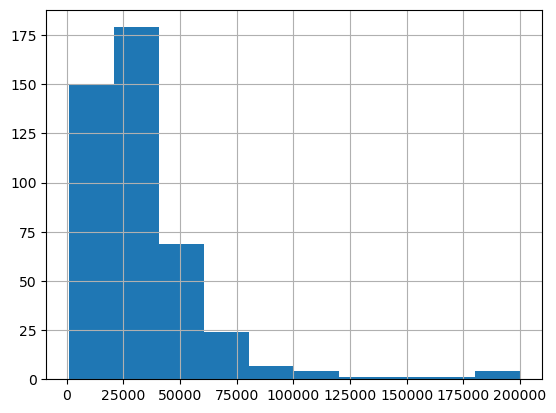

In [4]:
df['Total_Spend'].hist()

# EDA Visualization 

In [20]:
import matplotlib.pyplot as plt

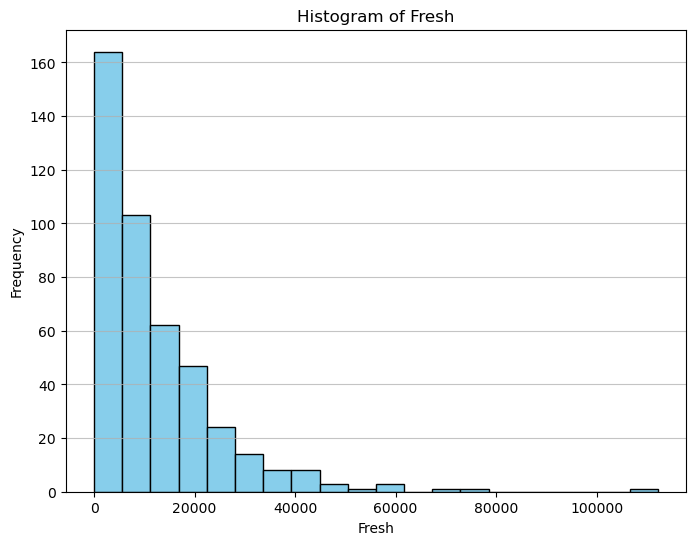

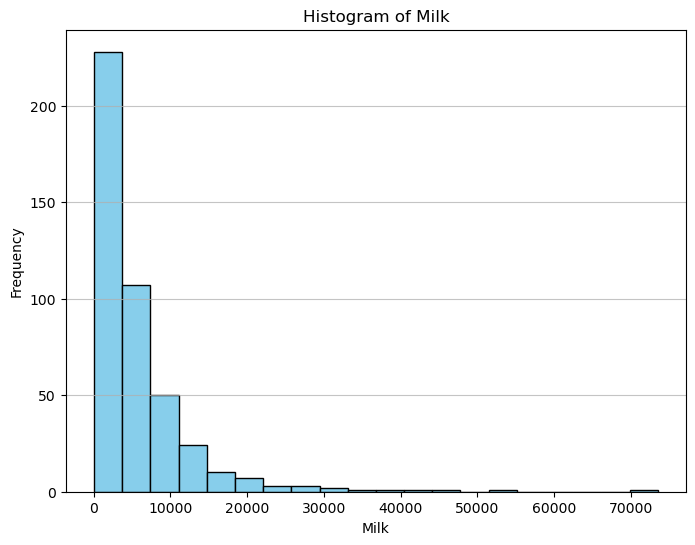

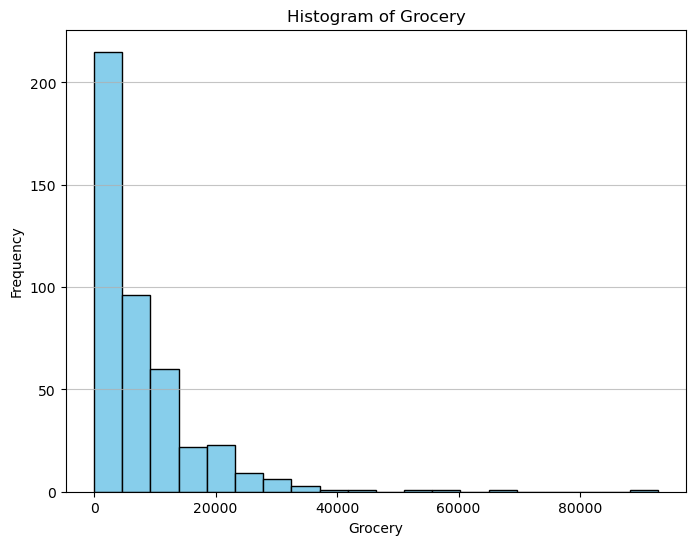

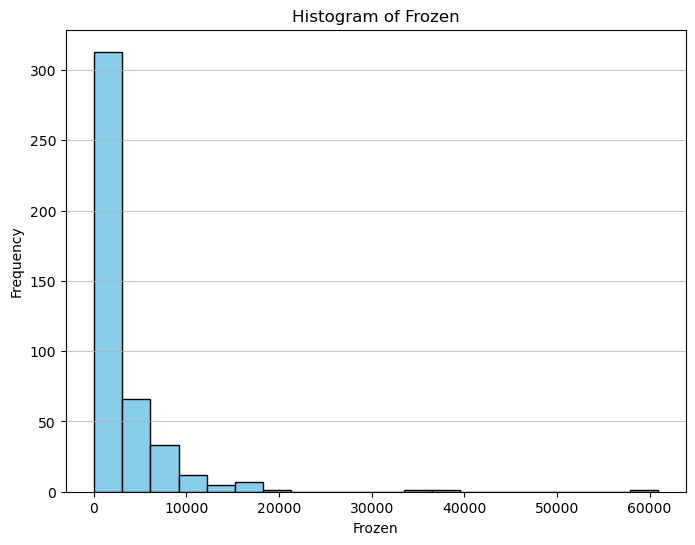

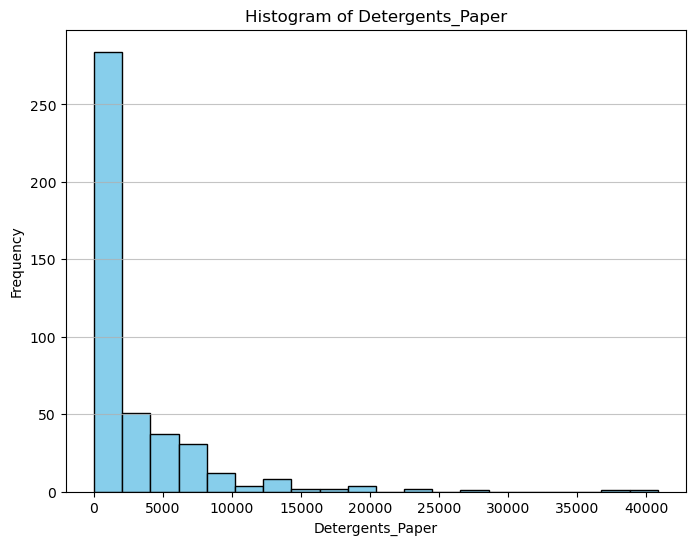

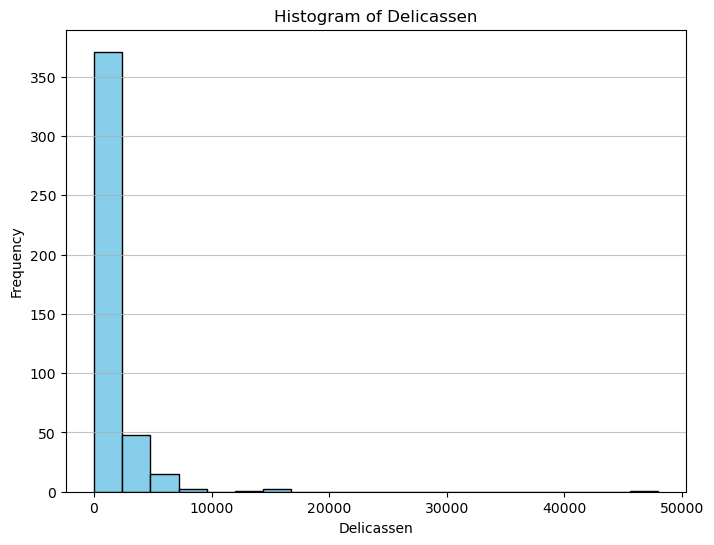

In [12]:
def plot_histograms(df, columns):
    for column in columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()


num_col = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

plot_histograms(df, num_col)

all non-categorical data are positively skewed 

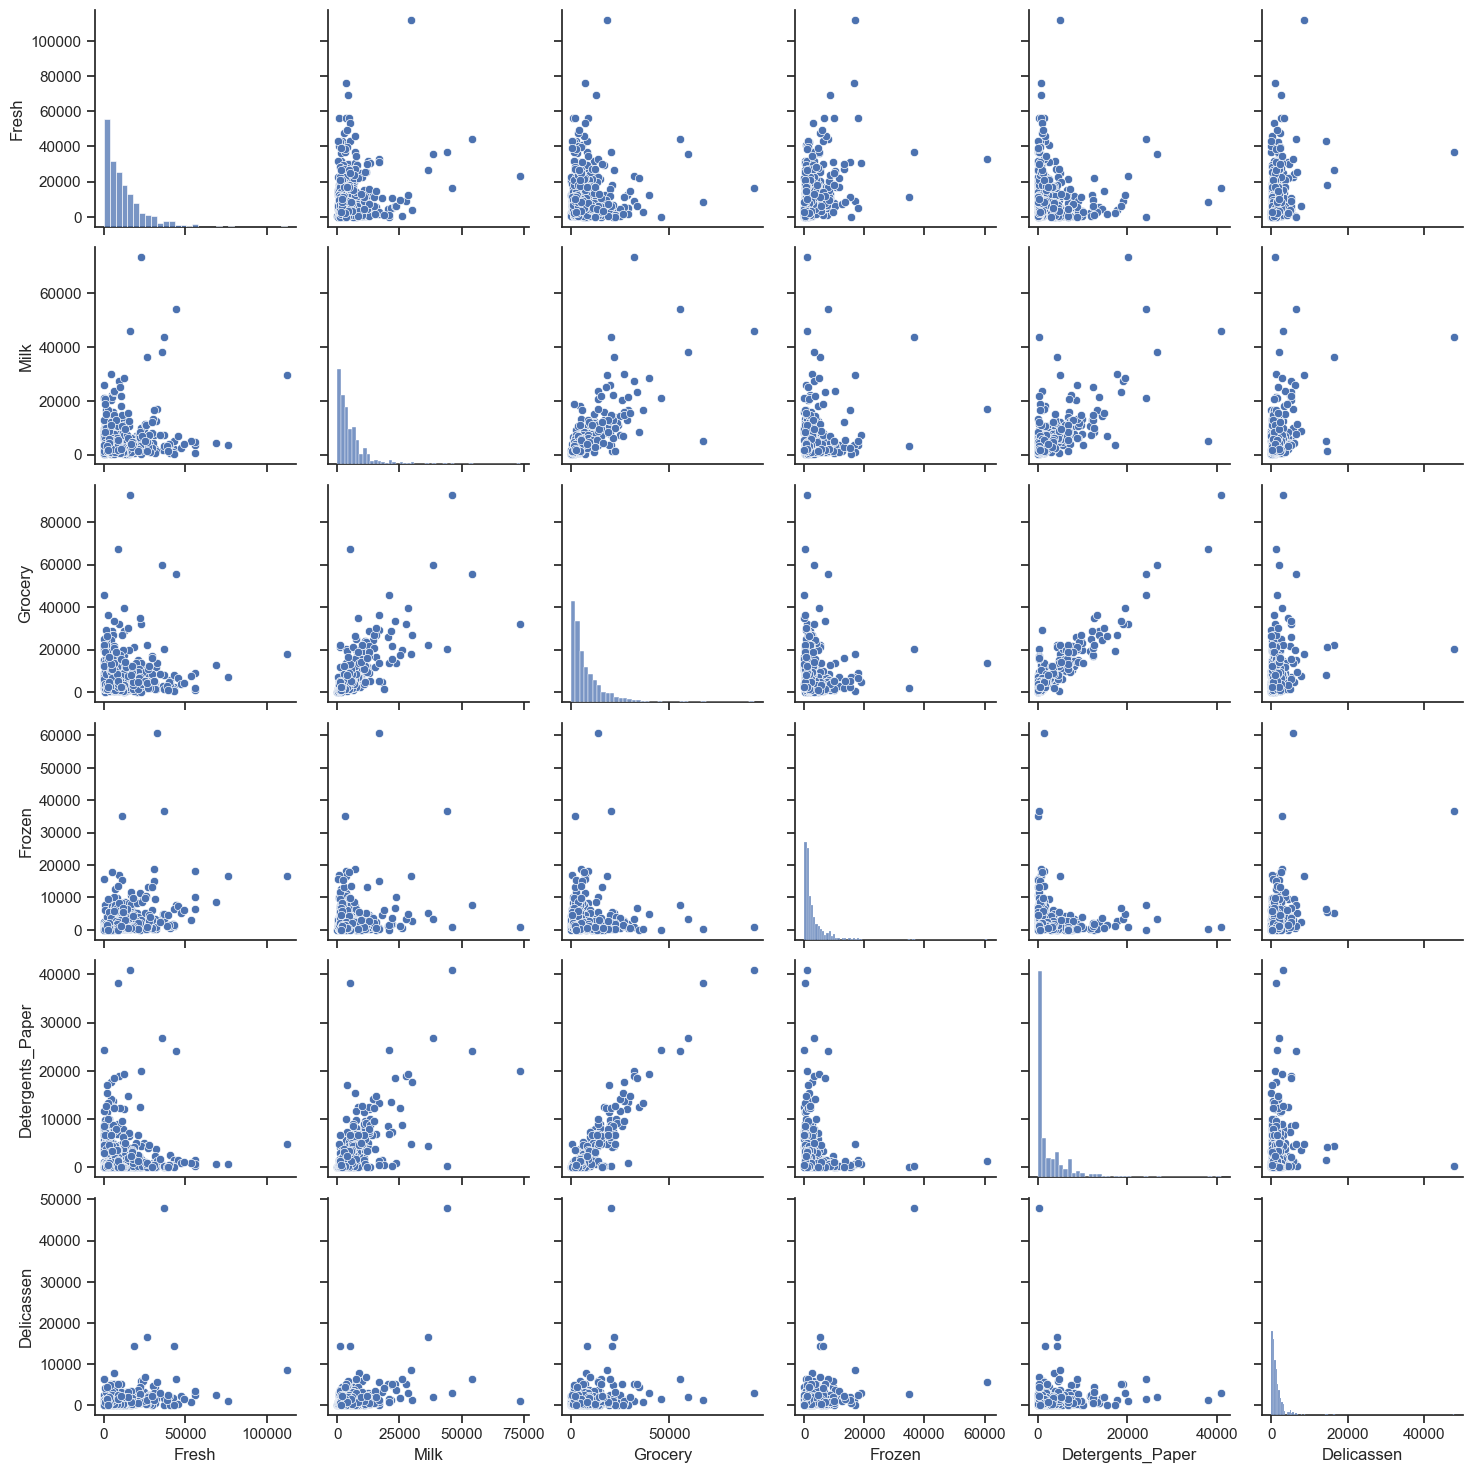

In [13]:
import seaborn as sns
# Plot scatterplots for all combinations
sns.set(style="ticks")
sns.pairplot(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.show()

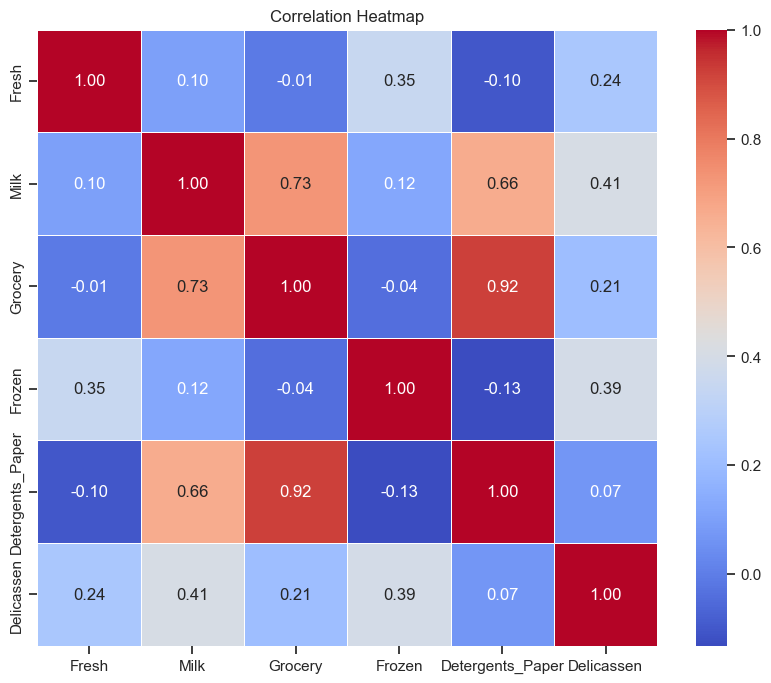

In [14]:
def plot_correlation_heatmap(df, columns):
    # Calculate the correlation matrix
    correlation_matrix = df[columns].corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()


columns_to_correlate = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
plot_correlation_heatmap(df, columns_to_correlate)

 - **Grocery** and **Detergents_Paper** are highly correlated

 - **Grocery** and **Milk** are  well correlated

 - **Milk** and **Detergents_Paper** are  moderately well correlated

 - Only one of these components in this grouping should be used for creating clusters


# Outlier Check

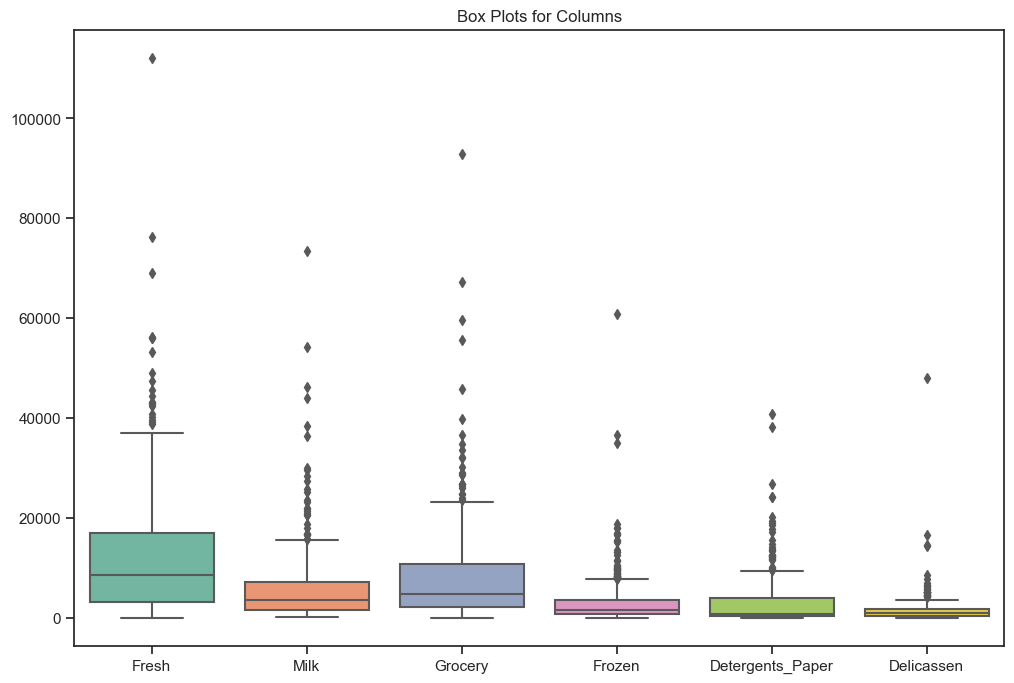

In [15]:
# Create box plots for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']], palette='Set2')
plt.title('Box Plots for Columns')
plt.show()

columns have similar patterns of outliers

C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


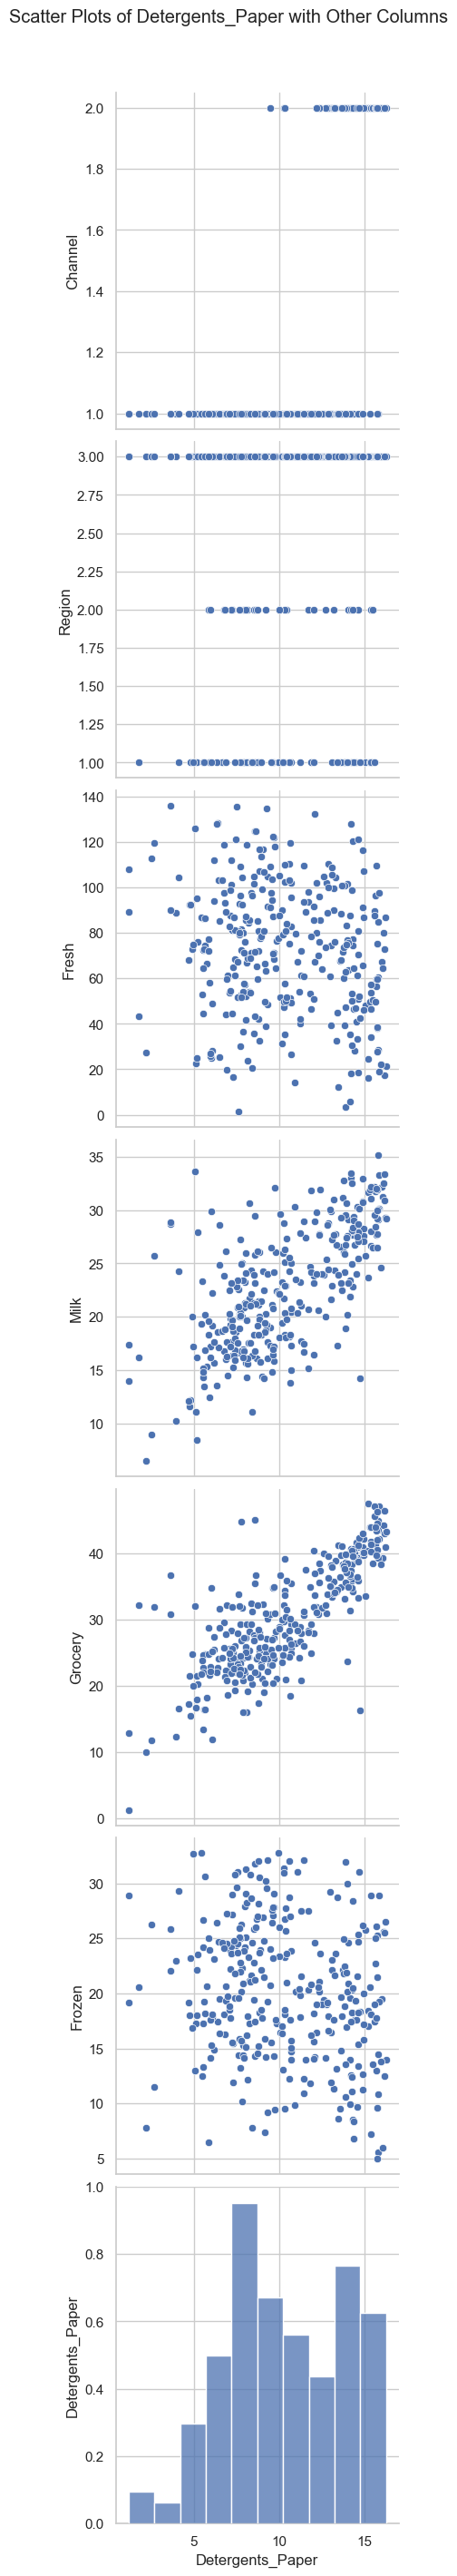

In [135]:
#since there is an interesting bimodal distribution in Detergents paper, I'd like to focus on this column 

# Scatter plots of Detergents_Paper with every other column
sns.set(style="whitegrid")
sns.pairplot(df, x_vars=["Detergents_Paper"], y_vars=df.columns[:-1], kind="scatter", height=4)
plt.suptitle("Scatter Plots of Detergents_Paper with Other Columns", y=1.02)
plt.show()

In [1]:
# Scatter plots of Frozen with every other column
sns.set(style="whitegrid")
sns.pairplot(df, x_vars=["Frozen"], y_vars=df.columns[:-1], kind="scatter", height=4)
plt.suptitle("Scatter Plots of Detergents_Paper with Other Columns", y=1.02)
plt.show()

NameError: name 'sns' is not defined

# Part II - KMeans Clustering

The objective of the analysis is to group similar ~~products~~ customers together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. 

- STEP 1:  pre-process the dataset

- STEP 2: determine the optimal number of clusters

- STEP 3: initialize the centroids

- STEP 4: assign data points to clusters

- STEP 5: update the centroids and repeat until convergence

## STEP 1. Preprocessing 

### boxcox transform

In [5]:
def apply_boxcox_transform(df, columns):
    """
    Apply Box-Cox transformation to specified columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns (list): List of columns to apply the Box-Cox transformation.

    Returns:
    - pd.DataFrame: Transformed DataFrame.
    """

    df_transformed = df.copy()

    for column in columns:
        if all(df_transformed[column] > 0):  # Box-Cox requires positive values
            transformed_values, _ = boxcox(df_transformed[column])
            df_transformed[column] = transformed_values

    return df_transformed

num_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


df = apply_boxcox_transform(df, num_cols)

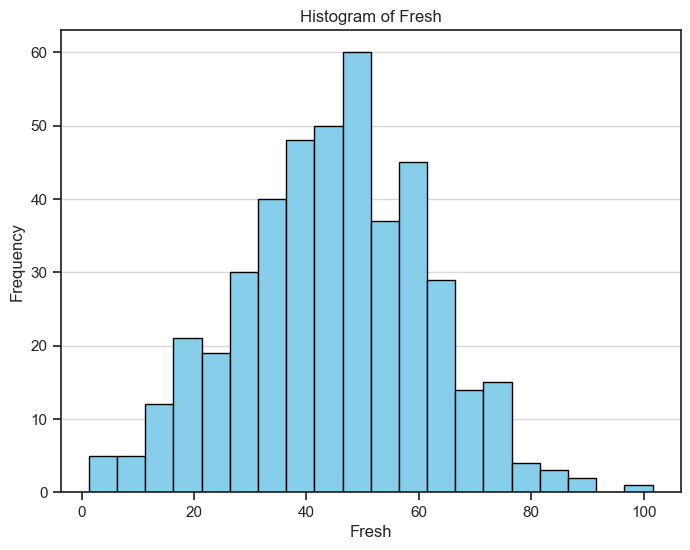

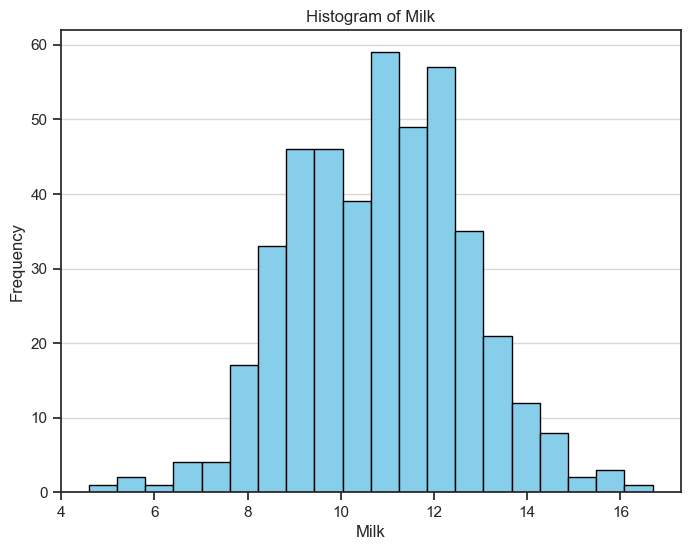

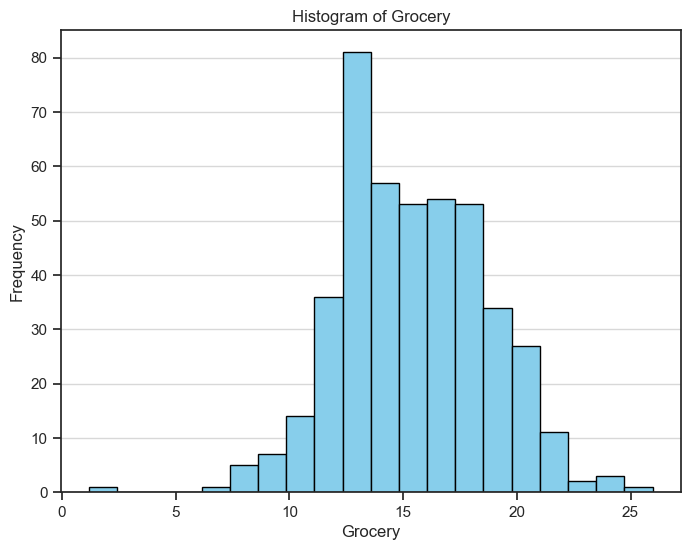

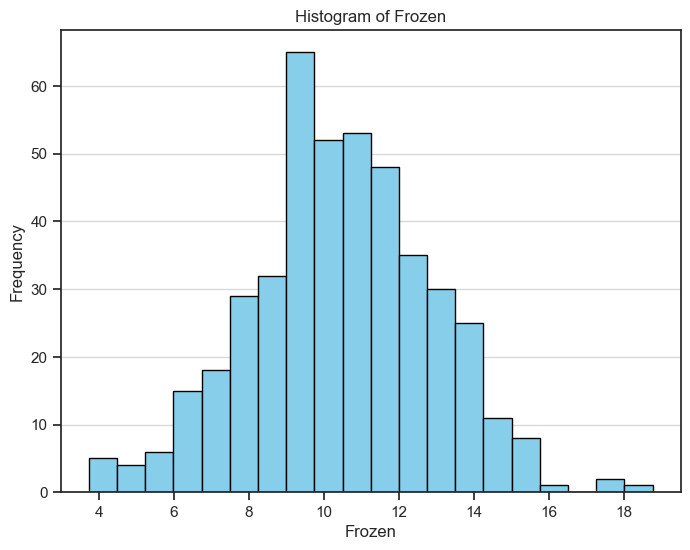

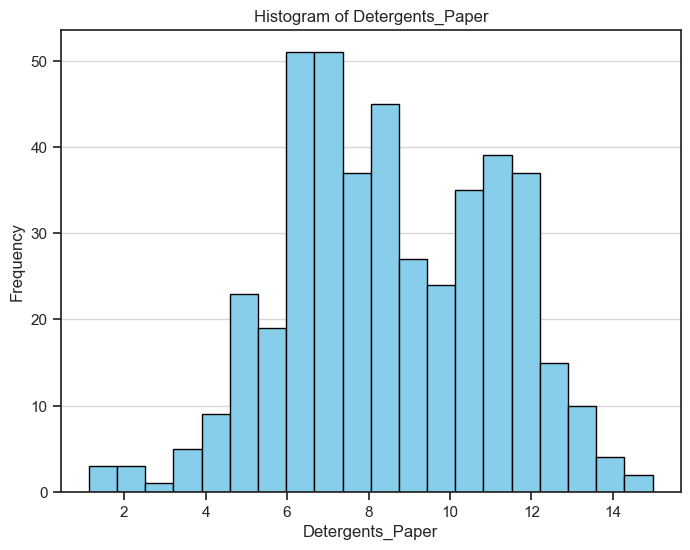

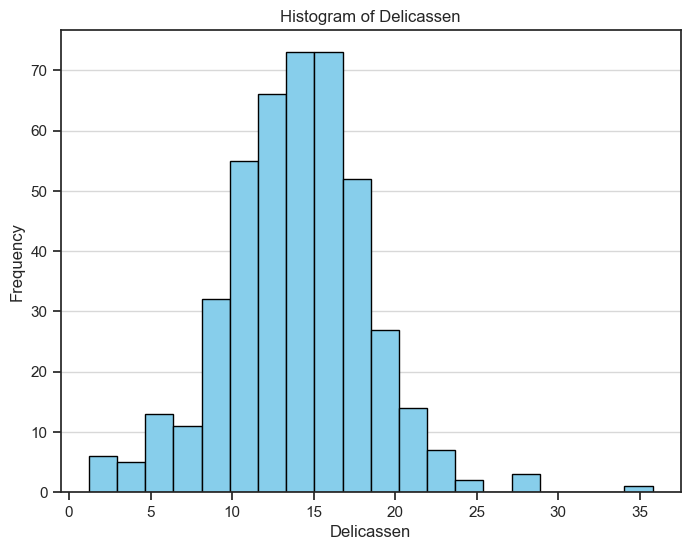

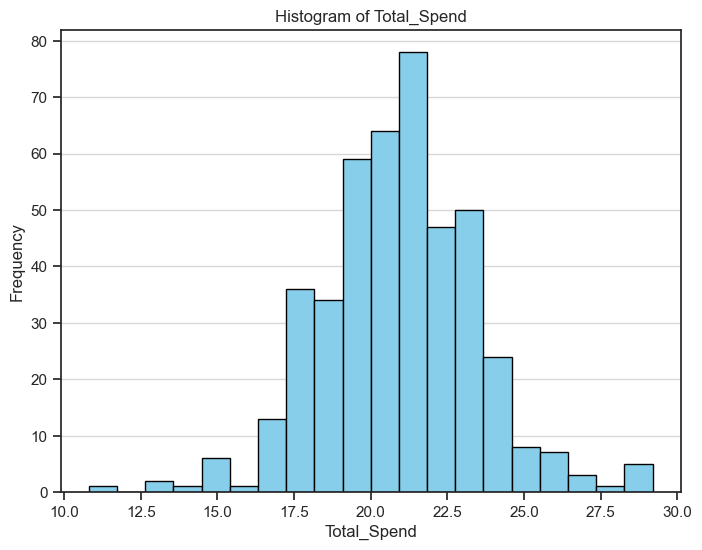

In [20]:
# Plot histograms for each column
for column in df[num_cols]:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [6]:

scaler = StandardScaler()

# Fit and transform the selected columns
df[num_cols] = scaler.fit_transform(df[num_cols])



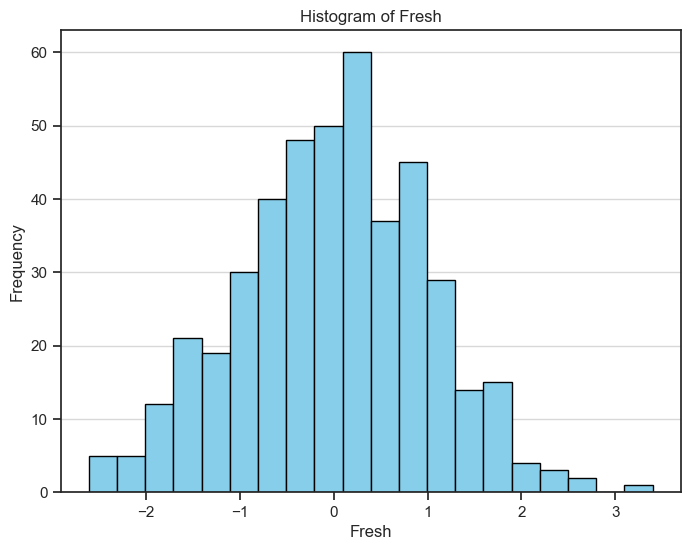

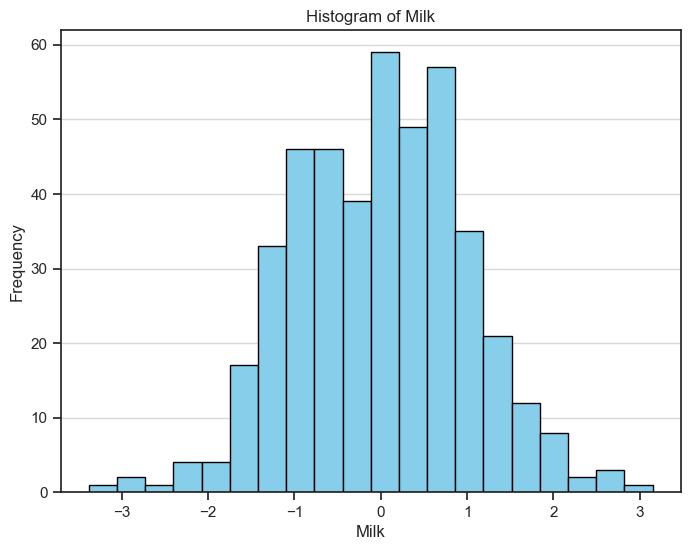

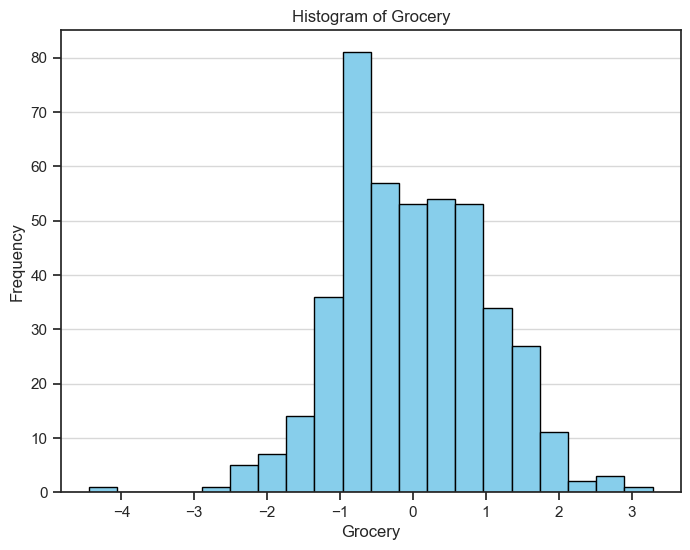

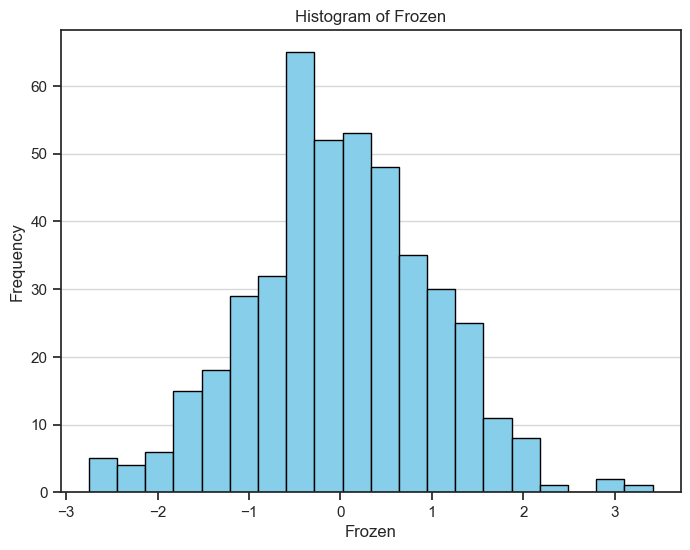

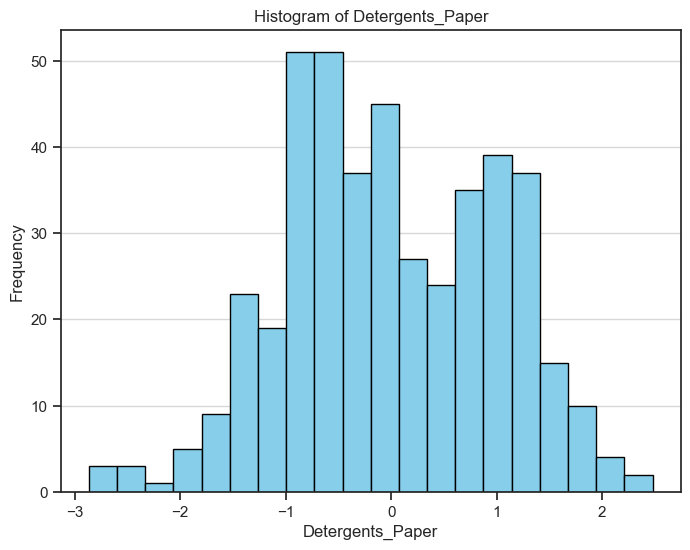

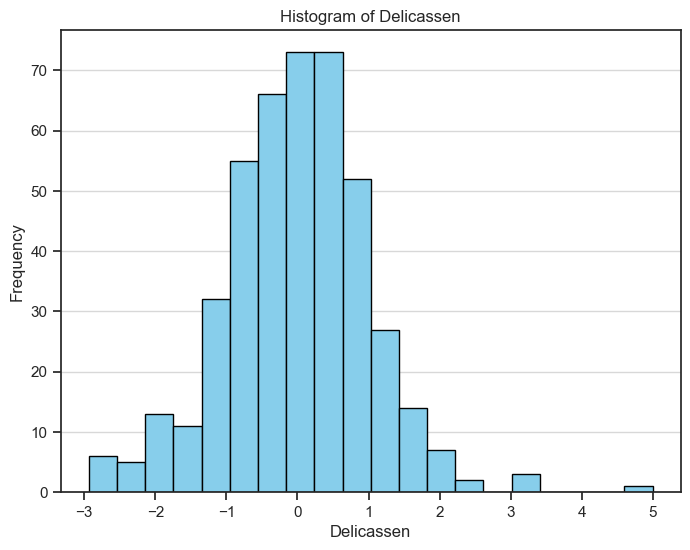

In [19]:
# Plot histograms for each column
for column in df[num_cols]:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

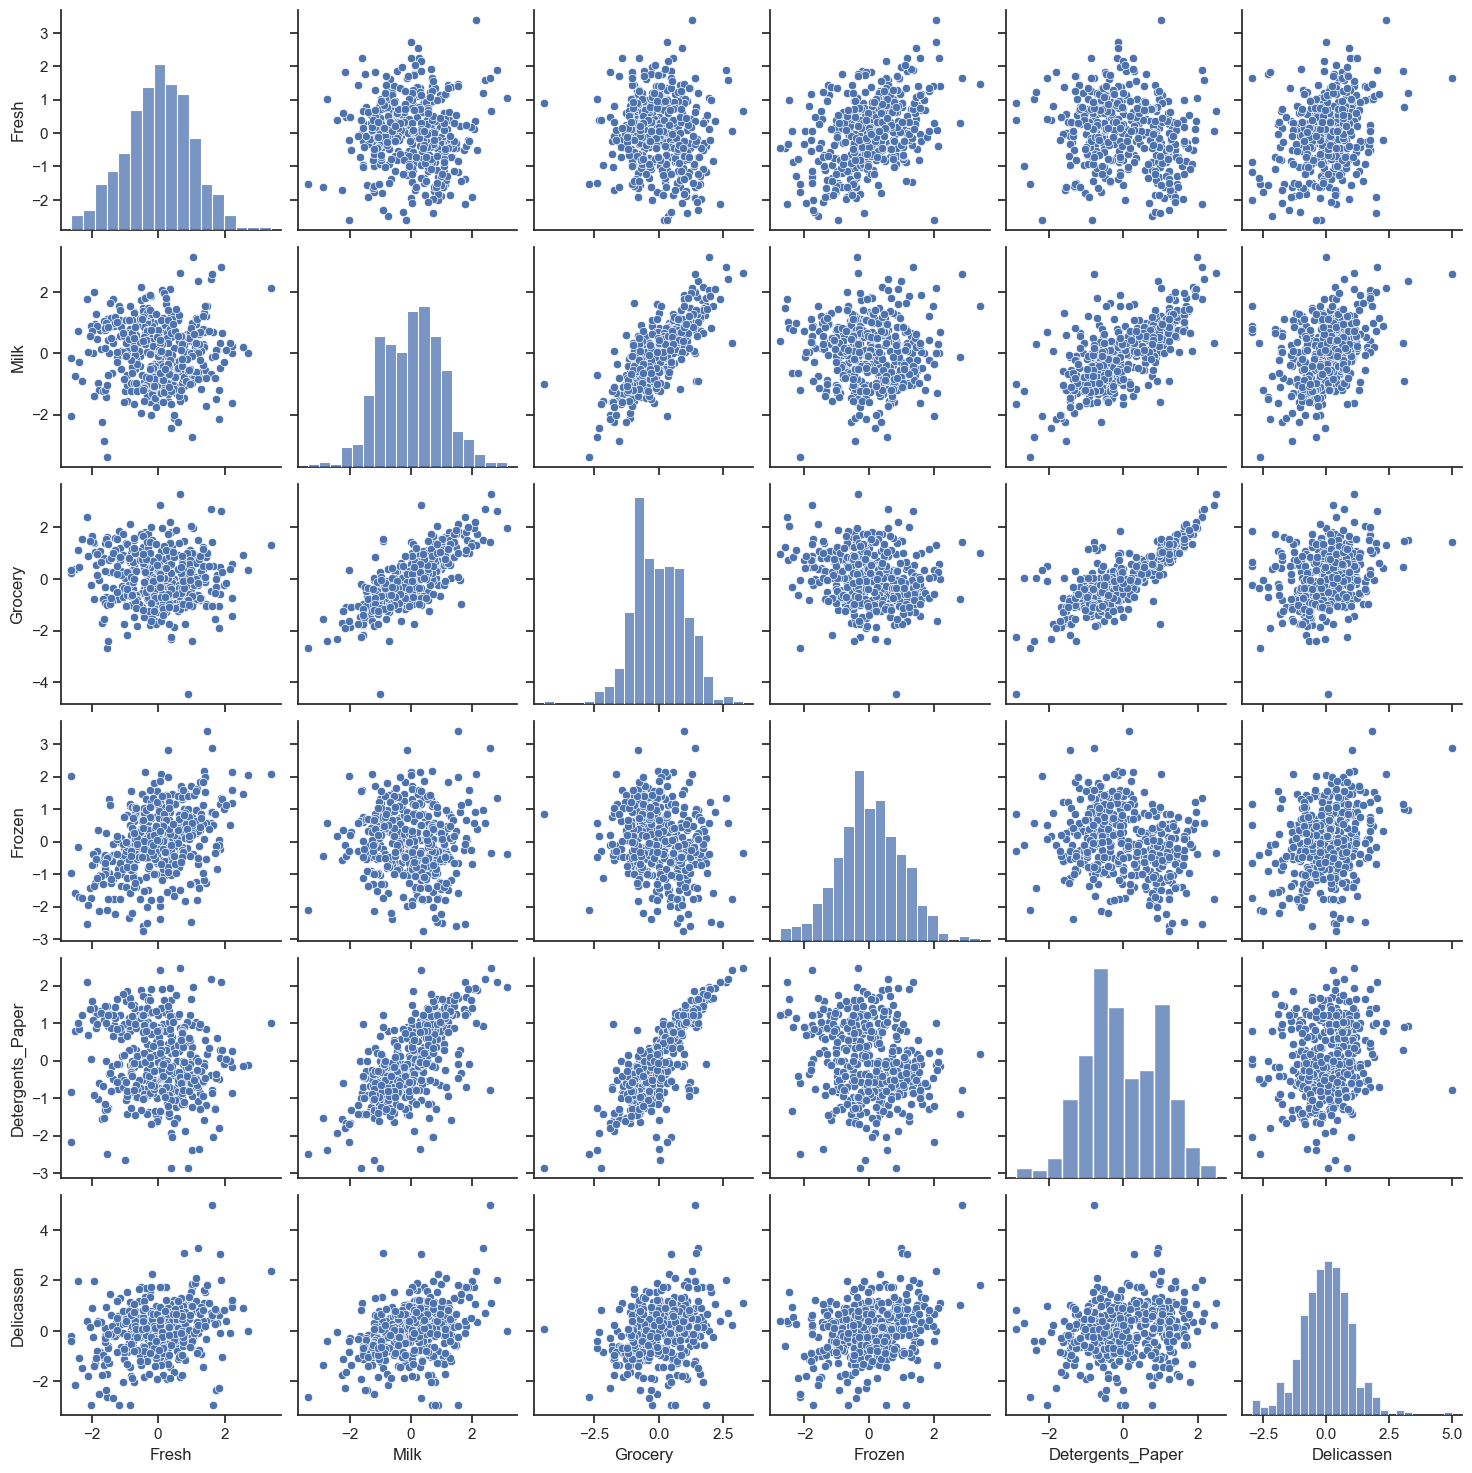

In [68]:
# Plot scatterplots 
sns.set(style="ticks")
sns.pairplot(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.show()



 - after boxcoxs transformation and scaling new correlations are visible on scatterplots between Frozen, Fresh and Delicassen 

## STEP 2. Determine the Optimal Number of Clusters

### Elbow Method KMeans Evaluation 

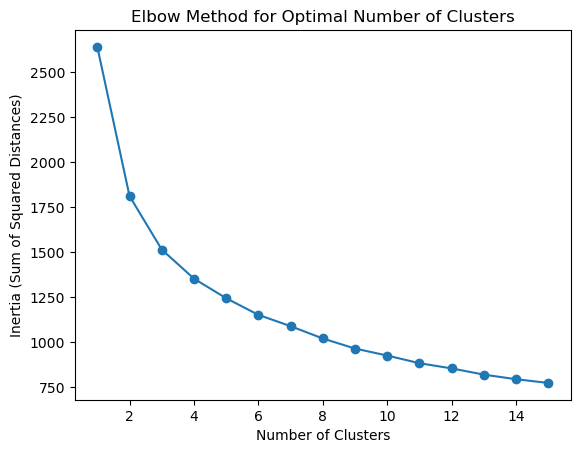

In [7]:

warnings.filterwarnings("ignore", category=FutureWarning, message="The default value of `n_init` will change from 10 to 'auto' in 1.4.")

warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads.")

#################
columns_for_clustering = num_cols
X = df[columns_for_clustering]

from sklearn import cluster
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Apply the Elbow Method
inertia_values = []
for i in range(1, 16):  # Trying cluster numbers from 1 to 15
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 16), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()





#### 2-5 clusters confirmed as candidates for optimal number of clusters using Elbow Method

### Silhouette Score Kmeans Evaluation

In [9]:
columns_for_clustering = num_cols

X = df[columns_for_clustering]

# Silhouette score values
silhouette_scores = []

# Trying cluster numbers from 2 to 15
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_assignments = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)



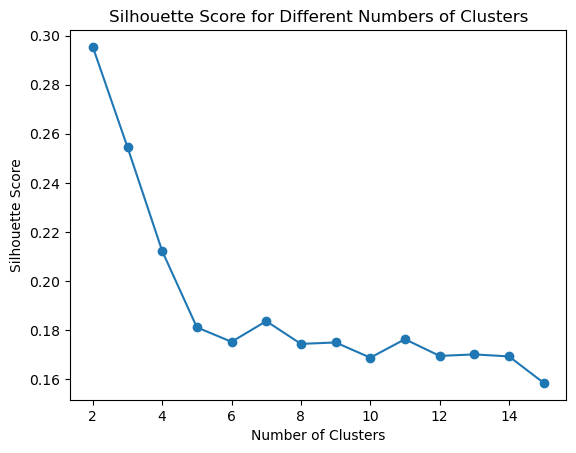

In [10]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### 2-4 clusters confirmed as candidates for optimal number of clusters using avg silhouette score, below 0.2 is a common cuttoff indicating  clustering configuration is not providing meaningful separation

## STEP 3-5 

- Initialize the Centroids
- Assign data points to clusters

- Udate the centroids and repeat until convergence

In [11]:
import numpy as np
#Initialize centroids
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    centroids = data[indices]
    return centroids

# Assign data points to clusters
def assign_to_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)
    return clusters

#Update centroids
def update_centroids(data, clusters, k):
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# KMeans algorithm
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        # Assign data points to clusters
        clusters = assign_to_clusters(data, centroids)
        
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, clusters



In [12]:
columns_for_conversion = num_cols

# Convert selected columns to an array of coordinates
coordinates_array = df[columns_for_conversion].values
coordinates_array

array([[ 0.41264577,  0.97930343,  0.39293678, -1.45670526,  0.61723793,
         0.33577869],
       [-0.11118037,  0.99509579,  0.62672869,  0.07971784,  0.74862873,
         0.59987651],
       [-0.19604292,  0.88789119,  0.40873795,  0.33199579,  0.79032437,
         2.24529514],
       ...,
       [ 0.54905898,  1.45816342,  1.87674208, -0.96850295,  1.75036734,
         0.64797795],
       [ 0.21600385, -0.5199112 , -0.71201437, -0.33357534, -0.97839273,
         0.77473442],
       [-0.77750908, -0.65750394, -0.61305339, -2.2051416 , -0.40830878,
        -1.86067523]])

In [42]:
#adding final cluster assiments to df
final_centroids, final_clusters = kmeans(coordinates_array, 2) 
df['KMeans_Cluster']=final_clusters
df['KMeans_Cluster'] = df['KMeans_Cluster'].astype('category')


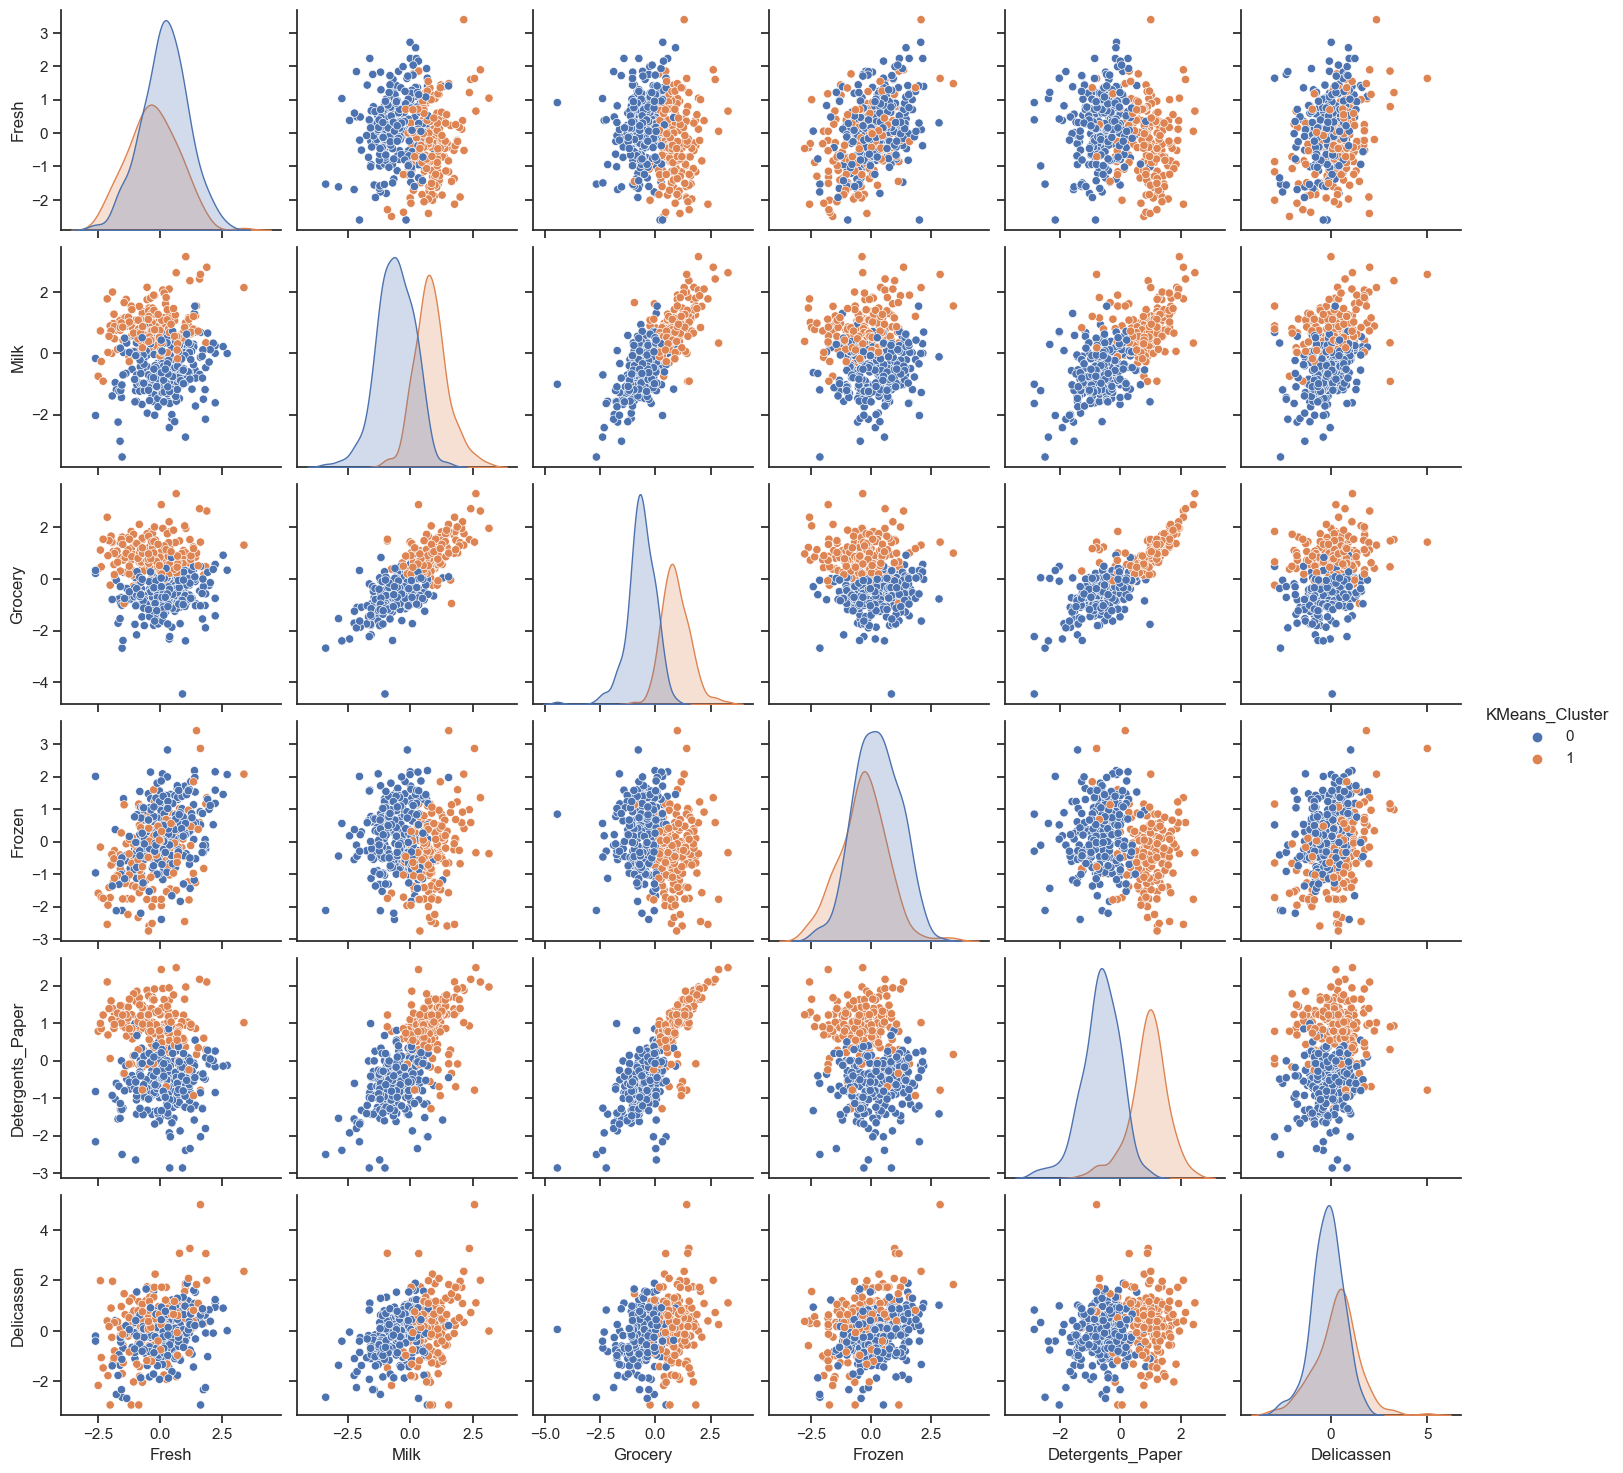

In [43]:
sns.set(style="ticks")


sns.pairplot(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen','KMeans_Cluster']], hue='KMeans_Cluster')

plt.show()

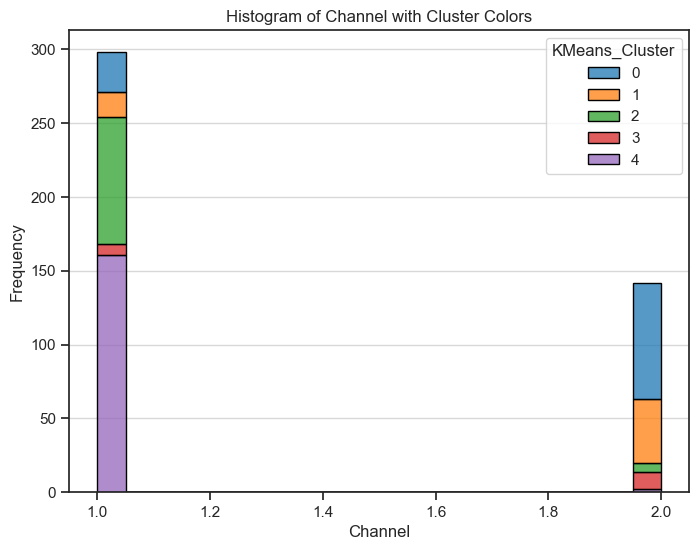

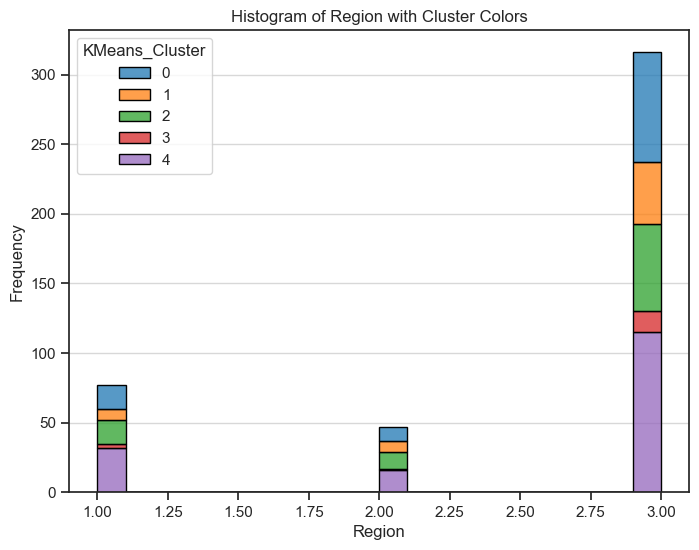

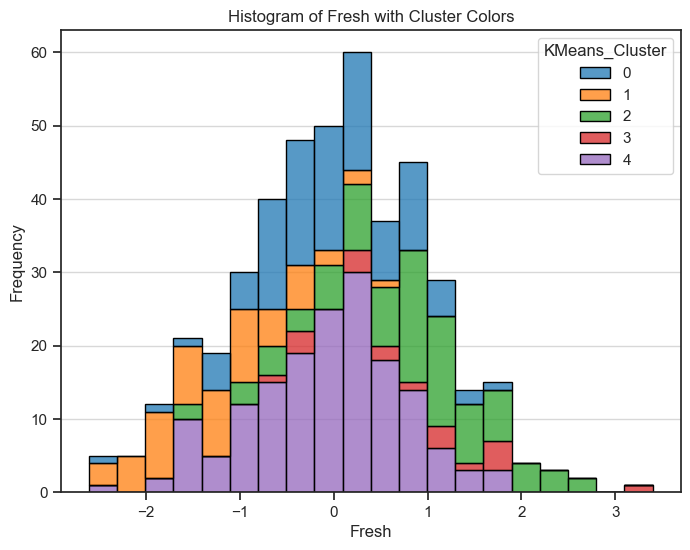

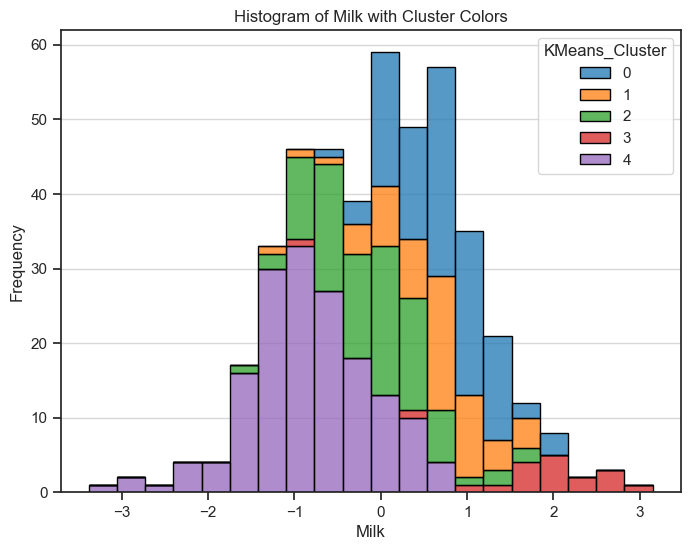

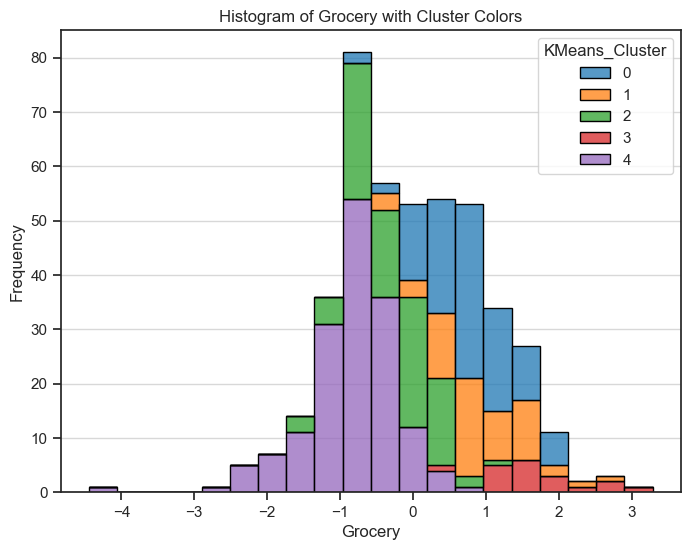

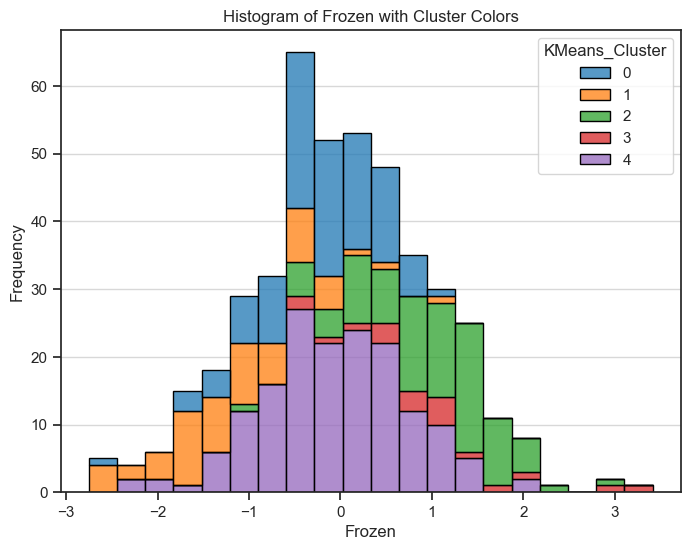

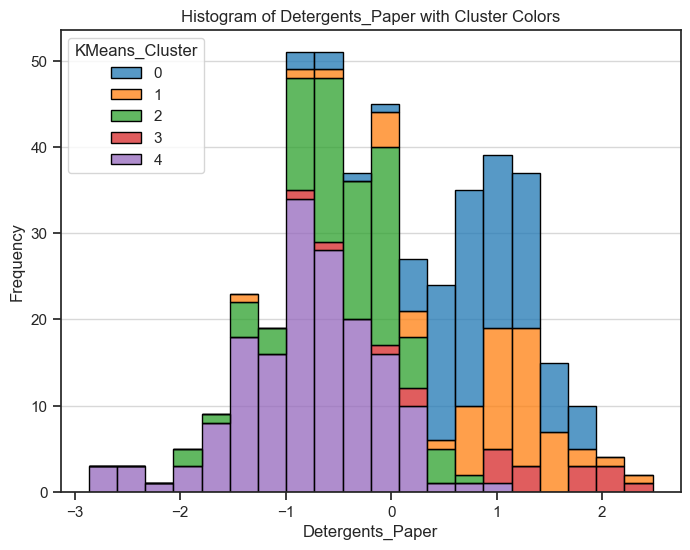

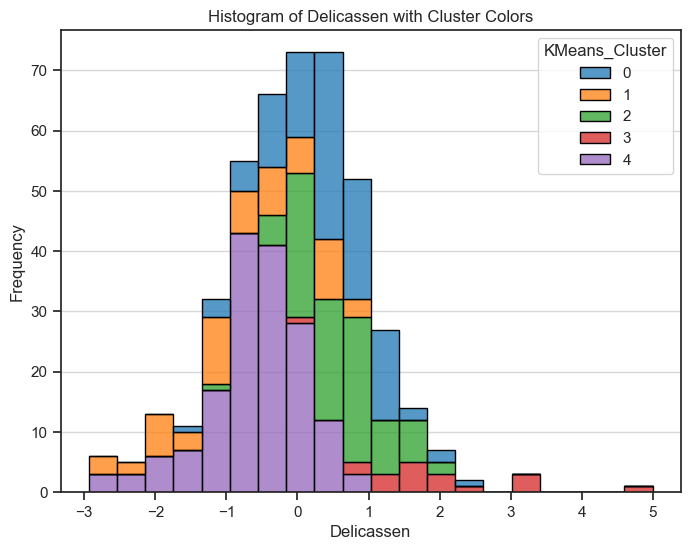

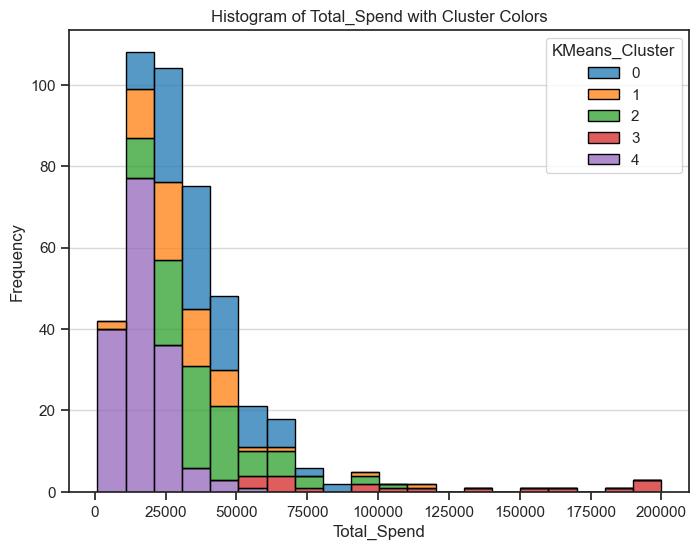

In [47]:
# Plot histograms with cluster colors
for column in df.columns:
    if column != 'KMeans_Cluster':  # Skip the 'Cluster' column
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, bins=20, hue='KMeans_Cluster', multiple='stack', edgecolor='black', palette='tab10')
        plt.title(f'Histogram of {column} with Cluster Colors')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [29]:
columns_for_clustering = num_cols
X = df[columns_for_clustering]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


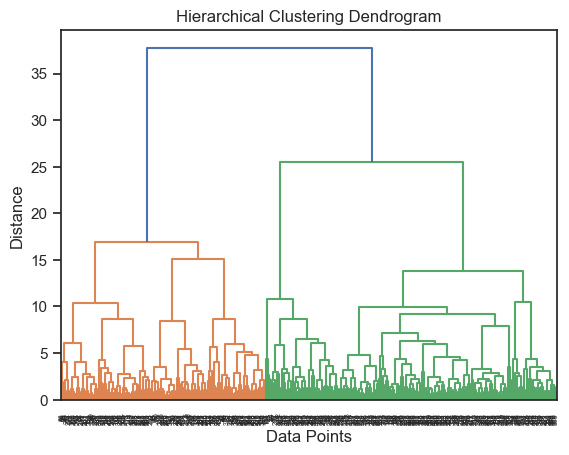

In [37]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agc = AgglomerativeClustering(n_clusters=2,affinity = 'euclidean',linkage = 'ward')
y_agc_pred = agc.fit_predict(X)

# Plotting the dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()



In [38]:


df['Cluster_Hier'] = y_agc_pred
df['Cluster_Hier'] = df['Cluster_Hier'].astype('category')

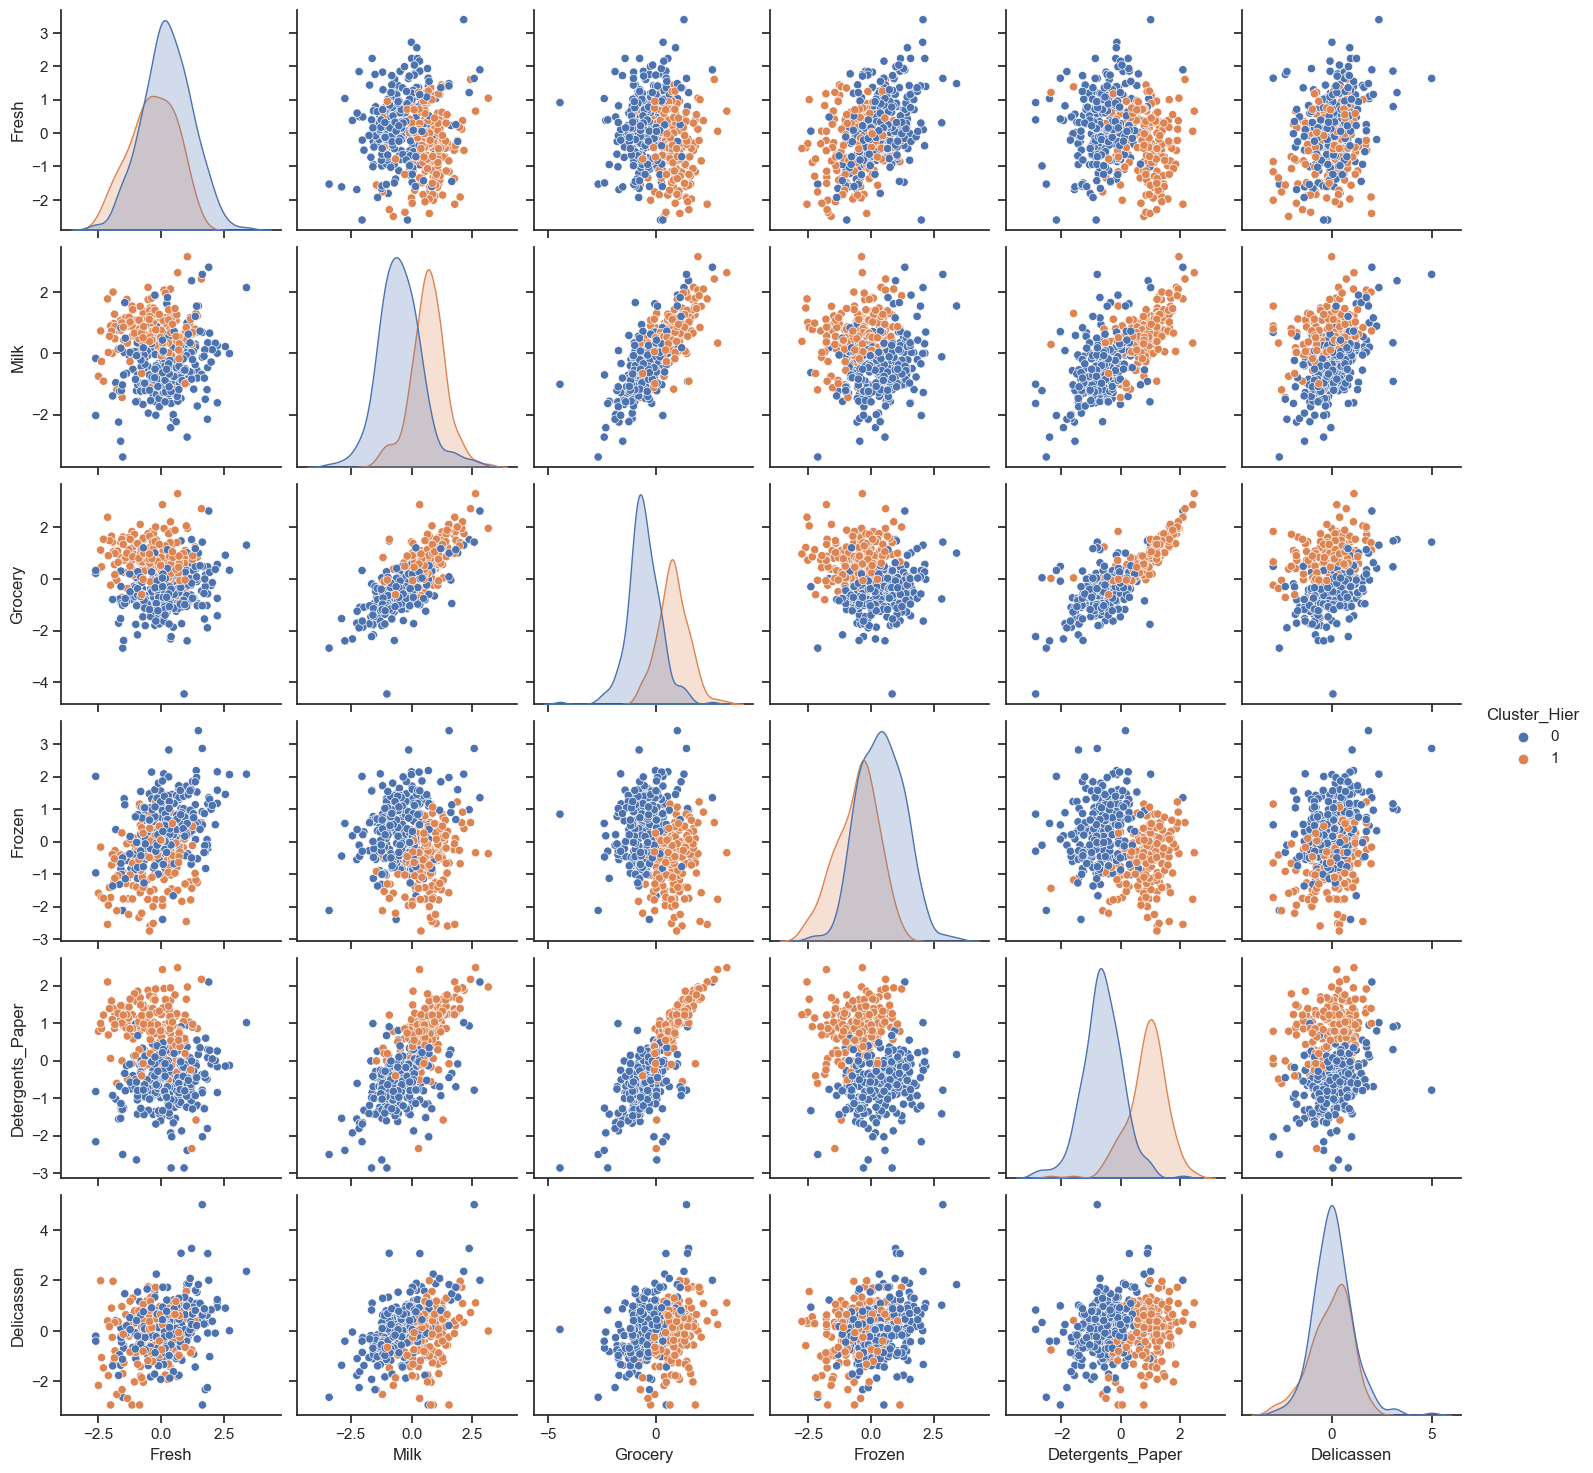

In [39]:
sns.set(style="ticks")


sns.pairplot(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen','Cluster_Hier']], hue='Cluster_Hier')

plt.show()

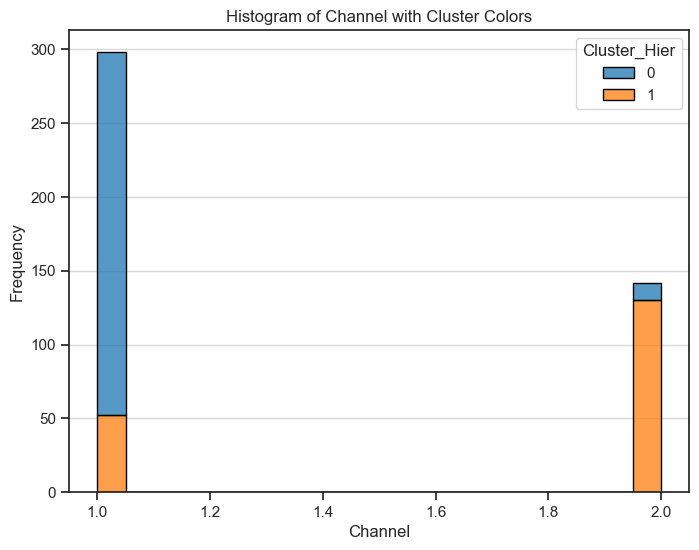

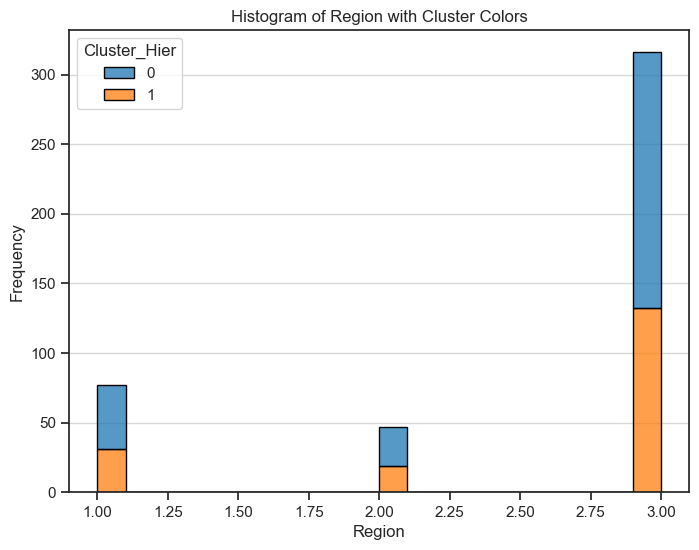

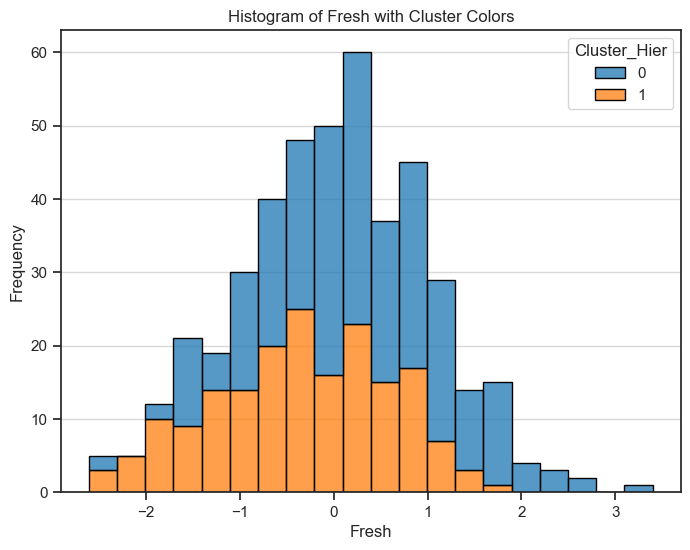

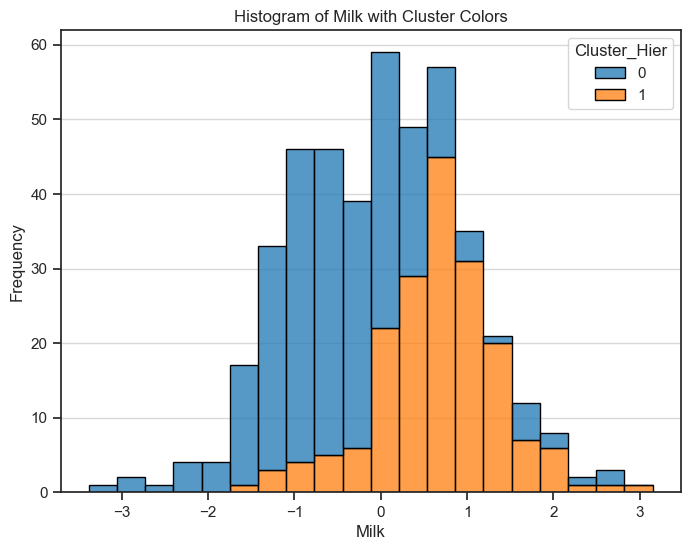

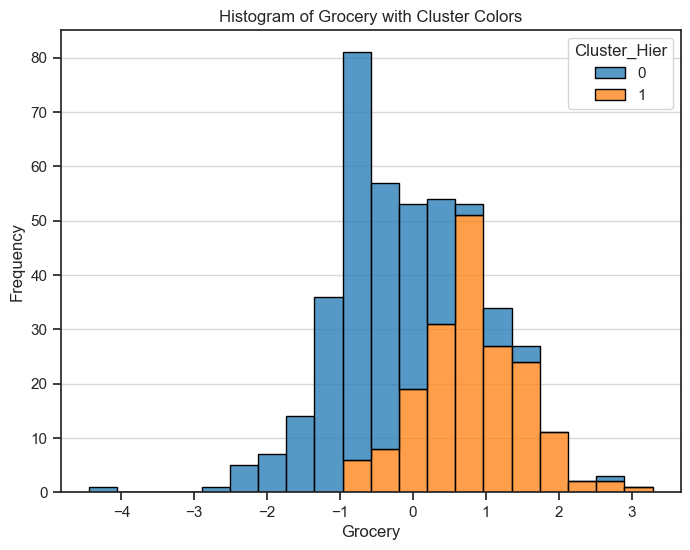

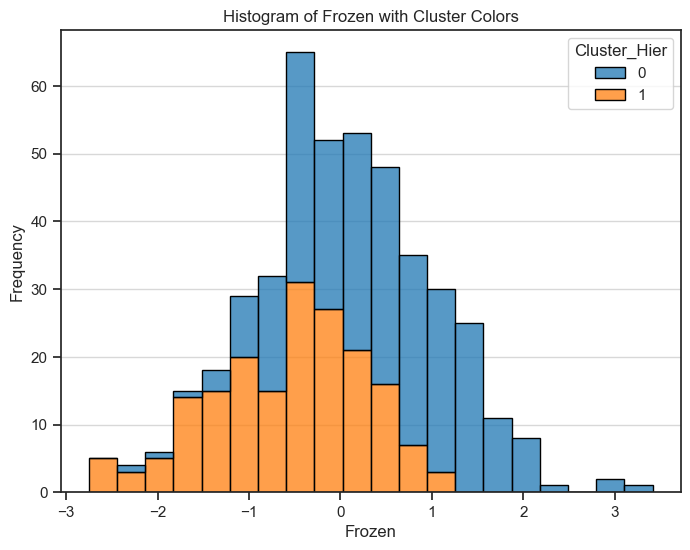

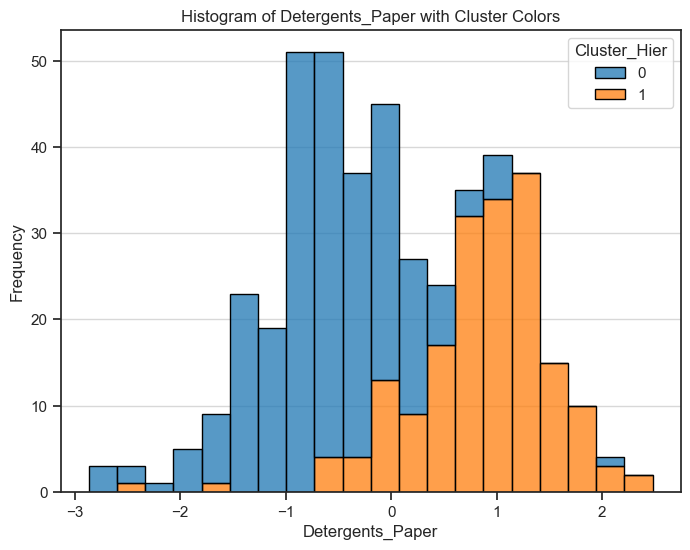

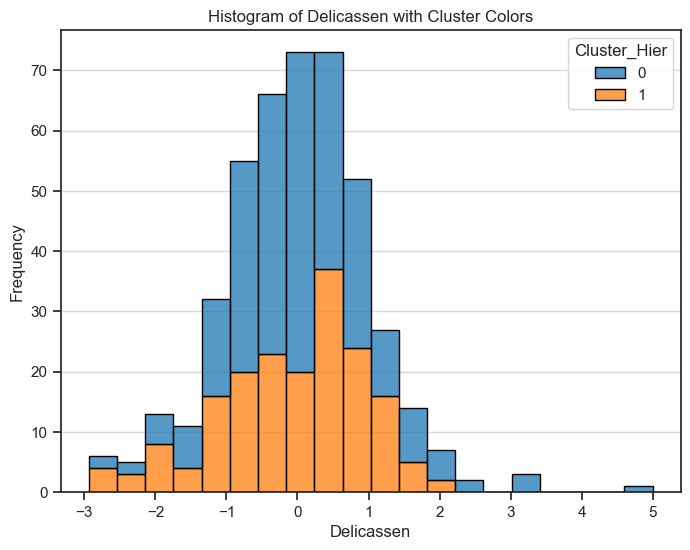

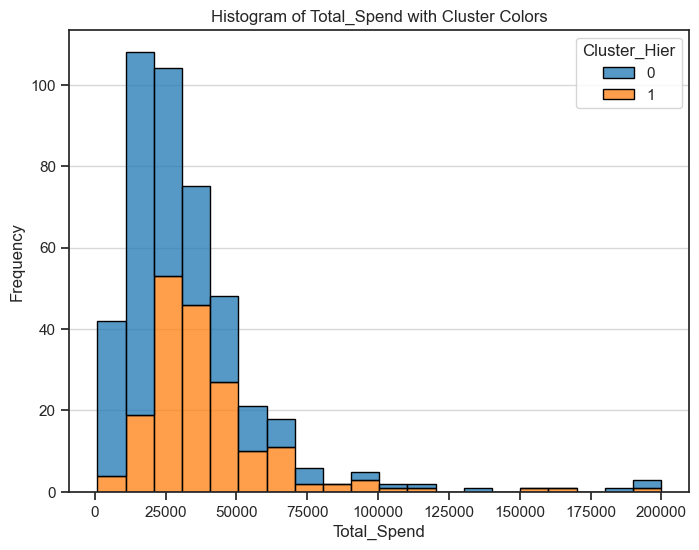

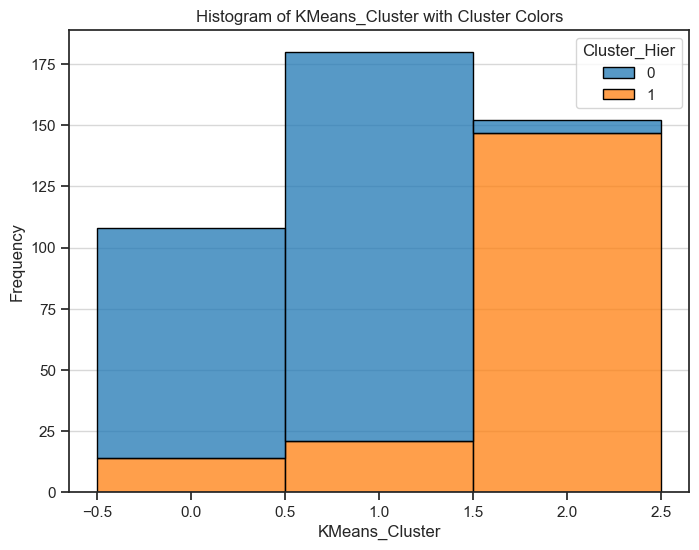

In [40]:
# Plot histograms with cluster colors
for column in df.columns:
    if column != 'Cluster_Hier':  # Skip the 'Cluster' column
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, bins=20, hue='Cluster_Hier', multiple='stack', edgecolor='black', palette='tab10')
        plt.title(f'Histogram of {column} with Cluster Colors')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

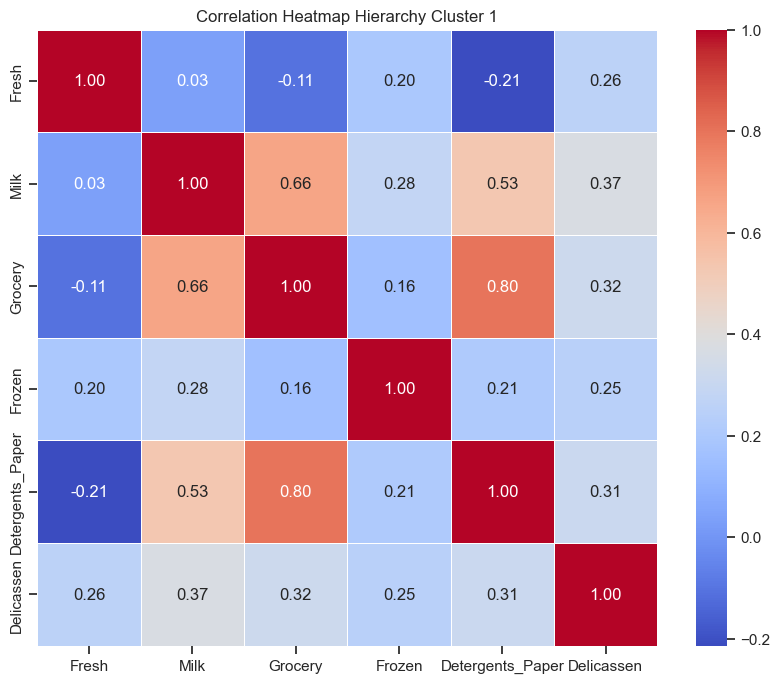

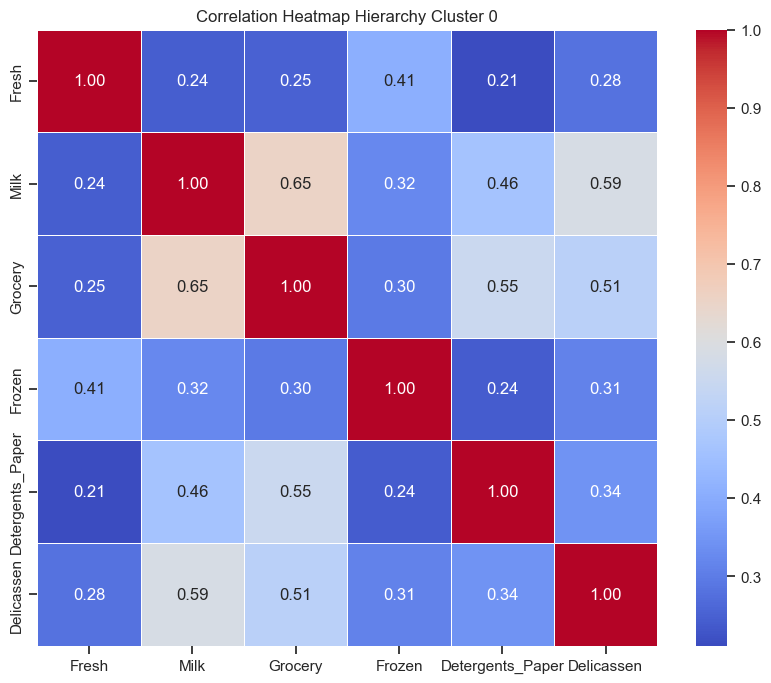

In [41]:
clusters=df['Cluster_Hier'].unique()

for category in clusters:
    # Filter data for the specific category
    subset_data = df[df['Cluster_Hier'] == category]
    correlation_matrix = subset_data[num_cols].corr()
    # Create a heatmap
    plt.figure(figsize=(10, 8))    
    # Create pair plot
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title(f'Correlation Heatmap Hierarchy Cluster {category}')
    plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# PCA

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_cols=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

X_num = df[num_cols]


# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_num)

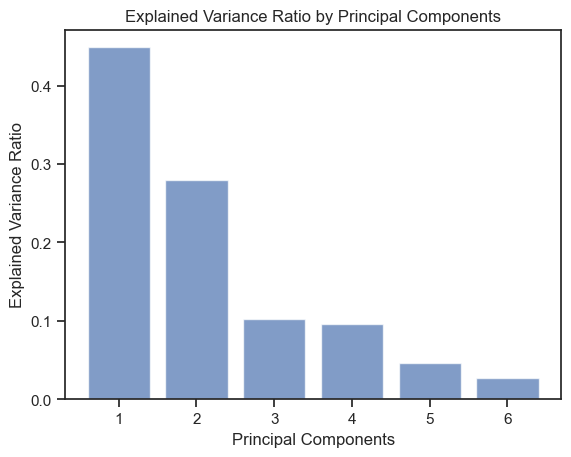

In [54]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [62]:
# Running total of explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
cumulative_variance_ratio

#using he first 4 PCs explains over 90% of the variance, the addiional 5th and 6th do not add much additional explaination of variance

array([0.44889984, 0.72892311, 0.83082123, 0.92708892, 0.97348163,
       1.        ])

In [63]:


# Apply PCA for 4 components
pca_4 = PCA(n_components=4)
X_pca4 = pca_4.fit_transform(X_num)




In [64]:
singular_values = pca_4.singular_values_

# Display the singular values
print("Singular Values for Principal Components:")
print(singular_values)

Singular Values for Principal Components:
[34.42521727 27.18936219 16.40155611 15.94197901]


In [66]:
# Apply PCA for 4 components
pca_4 = PCA(n_components=4)
X_pca4 = pca_4.fit_transform(X_num)


# Get the loadings for each original feature
loadings = pd.DataFrame(pca_4.components_.T, columns=[f'PC{i+1}' for i in range(X_pca4.shape[1])], index=num_cols)

# Display the loadings
print("Loadings:")
print(loadings)

Loadings:
                       PC1       PC2       PC3       PC4
Fresh             0.091739  0.592674  0.725786 -0.334860
Milk             -0.542397  0.118168  0.029336  0.074028
Grocery          -0.570879 -0.008741  0.144241  0.097294
Frozen            0.121982  0.596041 -0.146033  0.776930
Detergents_Paper -0.546160 -0.104649  0.187337  0.160296
Delicassen       -0.241489  0.518151 -0.628608 -0.493565


<Figure size 1000x600 with 0 Axes>

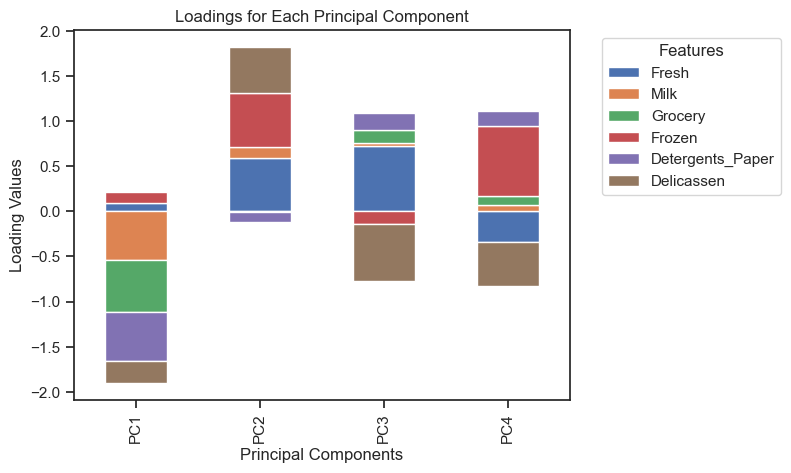

In [67]:
loadings_df = pd.DataFrame(loadings)

# Plot the loadings table
plt.figure(figsize=(10, 6))
loadings_df.T.plot(kind='bar', stacked=True)
plt.title('Loadings for Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Loading Values')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# PCA explaination/conclusion

- PC1 seemes to represent the positive correlation between Detergent_Paper, Milk and Grocery
- PC2 seemes to represent the positive correlation between Frozen, Fresh and Delicassen
- PC3 seems to represent the **more subtle** positve correlation between Fresh and Delicassen
- PC4 seems to represent the **more subtle** positve correlation between Detergent_Paper and Delicassen, with a minor Fresh component


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### Clustering Conclusions
 - Both Kmeans Clustering and Hierachical Clustering Unsupervised learning models when looking for 2 clusters, clustered customers into categoriies best described (by me, when looking at visual plots) as:
     - "**High** Spenders on Detergent_Paper, Grocery, Milk" 
     - **Low** Spenders on Detergent_Paper, Grocery, Milk"


### PCA conclusion

 - Spending Grocery, Detergents_Paper and Grocery are very well  correlated for high spenders in either category
 - Spending Grocery, Milk and Delicassen are the most positively correlated for low spenders on Detergent_Paper (cluster category 1)
 
 - Customers in Channel 1 are unlikely to be high spenders on Detergent_Paper
 - Whether customers are high spenders in Detergent_Paper (cluster category 1) has little effect on spending in Delicassen